# MyRadex usage example

In [1]:
%pylab inline

def lower_keys(p):
    return {k.lower(): p[k] for k in p}

def print_e(en, f):
    for i in range(len(en)):
        print('{:9.2f} {:9.2e}'.format(en[i], f[i]))
    return

def cast_into_dic(col_names, arr):
    '''col_names is column_info, and arr is data_transitions (see below).'''
    names = col_names.split()
    return {names[i]: arr[i,:] for i in range(len(names))}

import os

Populating the interactive namespace from numpy and matplotlib


# Start using the wrapper

## Import the wrapper

In [2]:
import wrapper_my_radex
wrapper = wrapper_my_radex.myradex_wrapper
about_info = wrapper.about.tostring()
column_info = wrapper.column_names.tostring()

## Load the molecule data

**The returned ```n_levels,n_item,n_transitions, n_partners``` are needed for the next step.**

In [4]:
n_levels, n_item, n_transitions, n_partners = \
    wrapper.config_basic(os.path.expanduser('~/_c/my_radex/'),
                         'ph2co-h2.dat', 2.73, True)

In [5]:
n_levels, n_item, n_transitions, n_partners

(41, 19, 107, 2)

## Do the statistical equilibrium calculation

### Using the default geometry type

In [30]:
params = {'Tkin': 25.0,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e6,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e5,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e6,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

"""The keywords to the wrapper function have to be in
lower case, so I have to lower the keys of params.
Of course you can use lower case letters from the beginning."""

params = lower_keys(params)

In [31]:
"""Do the calculation.
Return a four element tuple, whose meanings are self-evident."""

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)

### Calculate the critical densities

**You musst run `run_one_params` once before calling `calc_critical_density`** to feed in the physical parameters.

In [32]:
n_levels, n_item, n_transitions, n_partners = \
    wrapper.config_basic(os.path.expanduser('~/_c/my_radex/'),
                         '12C16O_H2.dat', 2.73, True)
print(n_levels, n_item, n_transitions, n_partners)

# A dummy call to run_one_params is necessary to feed in the parameters.
# This of course could be done better.
params.update({'n_levels': n_levels,
               'n_item': n_item,
               'n_transitions': n_transitions})
_ = wrapper.run_one_params(**params)

41 19 40 2


In [33]:
tau = 1e-10 # optically thin
n_cri, iup, ilow = wrapper.calc_critical_density(tau, n_partners, n_transitions)

ntran_show = 10

for j in range(n_partners):
    print('Collisional partner', j)
    for i in range(ntran_show):
        print(iup[i], ilow[i], '{:.3e}'.format(n_cri[j,i]))

Collisional partner 0
2 1 4.972e+02
3 2 4.070e+03
4 3 1.385e+04
5 4 3.270e+04
6 5 6.295e+04
7 6 1.052e+05
8 7 1.596e+05
9 8 2.270e+05
10 9 3.068e+05
11 10 4.023e+05
Collisional partner 1
2 1 4.408e+02
3 2 3.635e+03
4 3 1.150e+04
5 4 2.720e+04
6 5 5.287e+04
7 6 9.042e+04
8 7 1.415e+05
9 8 2.048e+05
10 9 2.833e+05
11 10 3.831e+05


**Calculate the column density with the old definition, aka.**
$$n_\text{crit,old}\equiv \frac{A_{ij}}{\gamma_{ij}}$$

In [34]:
tau = 1e-10 # optically thin
n_cri, iup, ilow = wrapper.calc_critical_density_old_def(tau, n_partners, n_transitions)

ntran_show = 10

for j in range(n_partners):
    print('Collisional partner', j)
    for i in range(ntran_show):
        print(iup[i], ilow[i], '{:.3e}'.format(n_cri[j,i]))

Collisional partner 0
2 1 2.214e+03
3 2 1.100e+04
4 3 3.634e+04
5 4 8.566e+04
6 5 1.742e+05
7 6 3.065e+05
8 7 4.790e+05
9 8 6.867e+05
10 9 9.063e+05
11 10 1.143e+06
Collisional partner 1
2 1 2.151e+03
3 2 1.216e+04
4 3 3.623e+04
5 4 8.408e+04
6 5 1.676e+05
7 6 2.928e+05
8 7 4.584e+05
9 8 6.559e+05
10 9 8.625e+05
11 10 1.128e+06


In [29]:
n_levels, n_item, n_transitions, n_partners = \
    wrapper.config_basic(os.path.expanduser('~/_c/my_radex/'),
                         'hcn.dat', 2.73, True)
print(n_levels, n_item, n_transitions, n_partners)
params.update({'n_levels': n_levels,
               'n_item': n_item,
               'n_transitions': n_transitions})

_ = wrapper.run_one_params(**params)

tau = 1e-10 # optically thin
n_cri, iup, ilow = wrapper.calc_critical_density(tau, n_partners, n_transitions)

ntran_show = 15

for j in range(n_partners):
    print('Collisional partner', j)
    for i in range(ntran_show):
        print(iup[i], ilow[i], '{:.3e}'.format(n_cri[j,i]))

26 19 25 2
Collisional partner 0
2 1 2.965e+05
3 2 2.787e+06
4 3 1.019e+07
5 4 2.347e+07
6 5 4.181e+07
7 6 6.530e+07
8 7 9.531e+07
9 8 1.331e+08
10 9 1.829e+08
11 10 2.427e+08
12 11 3.217e+08
13 12 4.143e+08
14 13 5.362e+08
15 14 6.738e+08
16 15 8.444e+08
Collisional partner 1
2 1 3.115e+00
3 2 3.751e+01
4 3 1.638e+02
5 4 4.720e+02
6 5 1.087e+03
7 6 2.160e+03
8 7 4.110e+03
9 8 1.336e+04
10 9 2.492e+198
11 10 3.435e+198
12 11 4.591e+198
13 12 5.980e+198
14 13 7.625e+198
15 14 9.546e+198
16 15 1.176e+199


In [9]:
_ = wrapper.run_one_params(**params)

In [10]:
tau = 1e-10 # optically thin
n_cri, iup, ilow = wrapper.calc_critical_density(tau, n_partners, n_transitions)

ntran_show = 5

for j in range(n_partners):
    print('Collisional partner', j)
    for i in range(ntran_show):
        print(iup[i], ilow[i], '{:.3e}'.format(n_cri[j,i]))

Collisional partner 0
2 1 2.965e+05
3 2 2.787e+06
4 3 1.019e+07
5 4 2.347e+07
6 5 4.181e+07
Collisional partner 1
2 1 3.115e+00
3 2 3.751e+01
4 3 1.638e+02
5 4 4.720e+02
6 5 1.087e+03


### Specify the geometry type

In [16]:
params = {'Tkin': 1e3,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e3,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e4,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e1,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions,
          'geotype': 'lvg'
         }

params = lower_keys(params)

"""
The geotype parameter can take the following values:
spherical
lvg
slab
default
"""

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params_geometry(**params)

# Play with the results

1. You may want to transpose ```data_transitions``` to match the expected layout, but you don't have to.
1. You may also cast the the results into a python dict using ```cast_into_dic``` defined above.

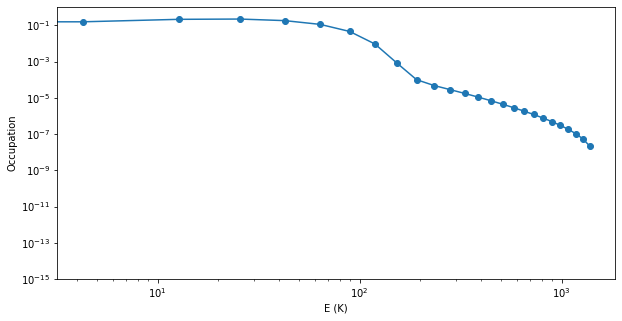

In [17]:
figure(figsize=(10,5))
plot(energies, f_occupations, marker='o')
ax = gca()
ax.set_xlabel('E (K)')
ax.set_ylabel('Occupation')
ax.set_ylim((1e-15,1e0))
ax.set_xscale('log')
ax.set_yscale('log')
#set_axis_format(ax, graygrid=True)

In [15]:
cooling_rate

5.551641847271466e-15

In [16]:
data_transitions.shape

(19, 107)

In [17]:
wrapper.flag_good

array(1, dtype=int32)

In [18]:
wrapper.n_item_column

array(19, dtype=int32)

**You can stop reading here.  I forgot what I did in the following.**

---

# Work with other molecules

In [ ]:
n_levels,n_item,n_transitions = \
    wrapper.config_basic(os.path.expanduser('~/not_synced/work/from_others/CHIANTI/toLAMDA/'),
                         'O.dat', 5.73, True)

params = {'Tkin': 1e3,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e6,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e9,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e6,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

params = lower_keys(params)

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)

print_e(energies, f_occupations)

In [11]:
n_levels,n_item,n_transitions = \
    wrapper.config_basic('~/not_synced/work/from_others/CHIANTI/toLAMDA/',
                         'N+_1e5K.dat', True)

params = {'Tkin': 1e3,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e6,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e9,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e6,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

lower_keys(params)

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)

print_e(energies, f_occupations)

     0.00  1.26e-01
    70.07  3.52e-01
   188.19  5.22e-01
 22036.57  1.65e-10
 47031.84  7.89e-23
 67312.53  1.41e-33


In [55]:
n_levels,n_item,n_transitions = \
    wrapper.config_basic('~/not_synced/work/from_others/CHIANTI/toLAMDA/',
                         'N+_1e5K.dat', True)

params = {'Tkin': 1e3,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e6,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e9,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e6,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

lower_keys(params)

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)

print_e(energies, f_occupations)

     0.00  1.26e-01
    70.07  3.52e-01
   188.19  5.22e-01
 22036.57  1.65e-10
 47031.84  7.89e-23
 67312.53  1.41e-33


In [3]:
n_levels,n_item,n_transitions,n_partners = \
    wrapper.config_basic('./', '12C16O_H2.dat', 2.73, True)

In [4]:
params = {'Tkin': 1e2,
          'dv_CGS': 10e5,
          'dens_X_CGS': 1e0,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e2,
          'HI_density_CGS': 0.0,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 0.0,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

params = lower_keys(params)

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)
d1 = cast_into_dic(column_info, data_transitions)
print(d1.keys())

params['H2_density_CGS'.lower()] = 1e4
energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)
d2 = cast_into_dic(column_info, data_transitions)

params['H2_density_CGS'.lower()] = 1e5
energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)
d3 = cast_into_dic(column_info, data_transitions)

params['H2_density_CGS'.lower()] = 1e6
energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)
d4 = cast_into_dic(column_info, data_transitions)

dict_keys([b'iup', b'ilow', b'Eup', b'freq', b'lam', b'Tex', b'tau', b'Tr', b'fup', b'flow', b'flux_K', b'flux_intflux_Jy', b'beta', b'Jnu', b'gup', b'glow', b'Aul', b'Bul', b'Blu'])


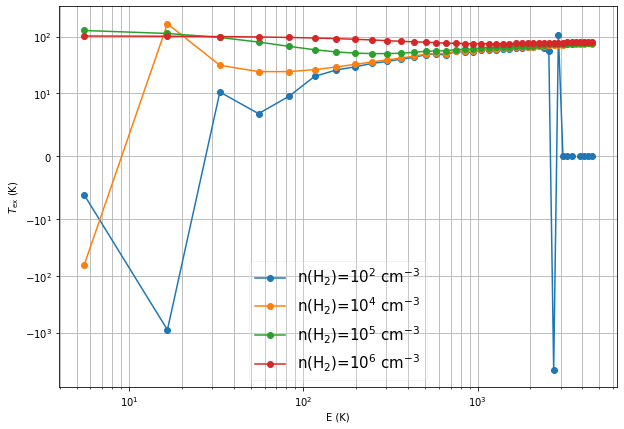

In [5]:
figure(figsize=(10,7))
plot(d1[b'Eup'], d1[b'Tex'], marker='o', label='n(H$_2$)=$10^2$ cm$^{-3}$')
plot(d2[b'Eup'], d2[b'Tex'], marker='o', label='n(H$_2$)=$10^4$ cm$^{-3}$')
plot(d3[b'Eup'], d3[b'Tex'], marker='o', label='n(H$_2$)=$10^5$ cm$^{-3}$')
plot(d3[b'Eup'], d4[b'Tex'], marker='o', label='n(H$_2$)=$10^6$ cm$^{-3}$')
ax = gca()
ax.set_xlabel('E (K)')
ax.set_ylabel(r'$T_{\rm ex}$ (K)')
ax.set_xscale('log')
ax.set_yscale('symlog', linthreshy=10)
_ = legend(fontsize=15, framealpha=0.2, loc='best')
ax.grid(which='both')